In [1]:
import torch
print(torch.__version__)
# sleep(1e4)

2.3.0.dev20240227


In [2]:
import numpy as np
# import datetime
import h5py
import pandas as pd
import random
# import torch.optim as optim
import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.data import Dataset
# from torch.utils.tensorboard import SummaryWriter
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

In [4]:
device

device(type='mps')

In [5]:
def crop_centre(img, new_width, new_height):
    height, width, _ = img.shape
    startx = width//2 - new_width//2
    starty = height//2 - new_height//2    
    return img[  starty:starty + new_height, startx:startx + new_width, :]  

In [6]:
def add_watermark(im, texts, angle = 45):
  # image opening
  w, h = im.size
  font_size = w//8 if h > w else h//8 
  font_size = random.randint(font_size*0.5, font_size*1.5)
  wim = im.copy().rotate(-angle, expand=True).convert("RGBA") #watermark image
  fnt = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf", int(font_size/2))

  txt_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255), random.randint(50,200))

  txt = Image.new("RGBA", wim.size, (255, 255, 255, 0))
  d = ImageDraw.Draw(txt)
  text_w, text_h = random.randint(w*.25, w*.75), random.randint(h*.25, h*.75)
  for text in texts:
    d.text((text_w, text_h) , text, font=fnt, fill=txt_color)
    text_h += font_size//2
    text_w += random.randint(-font_size//4, font_size//4)
  out = Image.alpha_composite(wim, txt)
  out = out.rotate(angle, expand = True)
  wp, hp = out.size
  sw, sh = (wp-w)//2, (hp-h)//2
  out = out.crop(box = (sw, sh, w+sw, h+sh)).convert("RGB")
  # print(full_path)
  # out.save(output_image_path)
  return out


In [7]:
texts = ["Nihal Arju", "nihal.arju@intel.com"]

In [8]:
def tensor_from_npimage(img):
    return torch.tensor(img, device=device, dtype=torch.float32).\
    permute(2,0,1).view(1,3,128,128) / 255.0


In [9]:
# dataset class

class CoilDataset(Dataset):
    
    def __init__(self, file):
        self.file_object = h5py.File(file, 'r')
        self.dataset = self.file_object['coil-100']
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        if (index >= len(self.dataset)):
            raise IndexError()
        img = np.array(self.dataset[str(index)+'.png'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        pil_img = Image.fromarray(img)
        angle = random.randint(15,80)
        wtr_img = add_watermark(pil_img, texts=texts, angle=angle)
        wtr_img = np.array(wtr_img)
        return tensor_from_npimage(img), tensor_from_npimage(wtr_img)
    
    def plot_image(self, index):
        img = np.array(self.dataset[str(index)+'.png'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        plt.imshow(img, interpolation='nearest')
    
    def plot_watermarked(self, index):
        img = np.array(self.dataset[str(index)+'.png'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        pil_img = Image.fromarray(img)
        angle = random.randint(15,80)
        wtr_img = add_watermark(pil_img, texts=texts, angle=angle)
        wtr_img = np.array(wtr_img)
        plt.imshow(wtr_img, interpolation='nearest')

    # def __getitem__(self, index):
    #     if (index >= len(self.dataset)):
    #       raise IndexError()
    #     img = np.array(self.dataset[str(index)+'.png'])
    #     return torch.tensor(img, device=device, dtype=torch.float32) / 255.0
    
    # def plot_image(self, index):
    #     plt.imshow(np.array(self.dataset[str(index)+'.png']), interpolation='nearest')

In [10]:
# orih5 = r"/Users/narju/Documents/code/educative/retouch/coil-100-originals.h5py"
wtr5 = r"/Users/narju/Documents/code/educative/retouch/coil-100-watermarked.h5py"
orih5 = r"/Users/narju/Documents/code/educative/retouch/coil-100-texts.h5py"

In [11]:
f = h5py.File(orih5)

In [12]:
list(f.keys())

['coil-100']

In [13]:
with h5py.File(orih5,'r') as f_obj:
    print("datasets: ")
    for dset in f_obj:
        print(dset)
    print("keys: ")
    for group in f_obj.keys():
        print(group)

    dataset = f_obj['coil-100']

datasets: 
coil-100
keys: 
coil-100


def add_watermark(im, texts, angle = 45):
  # image opening
  w, h = im.size
  font_size = w//8 if h > w else h//8 
  font_size = random.randint(font_size*0.5, font_size*1.5)
  wim = im.copy().rotate(-angle, expand=True).convert("RGBA") #watermark image
  fnt = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf", int(font_size/2))

  txt_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255), random.randint(50,200))

  txt = Image.new("RGBA", wim.size, (255, 255, 255, 0))
  d = ImageDraw.Draw(txt)
  text_w, text_h = random.randint(w*.25, w*.75), random.randint(h*.25, h*.75)
  for text in texts:
    d.text((text_w, text_h) , text, font=fnt, fill=txt_color)
    text_h += font_size//2
  out = Image.alpha_composite(wim, txt)
  out = out.rotate(angle, expand = True)
  wp, hp = out.size
  sw, sh = (wp-w)//2, (hp-h)//2
  out = out.crop(box = (sw, sh, w+sw, h+sh)).convert("RGB")
  # print(full_path)
  # out.save(output_image_path)
  return out

texts = ["Nihal Arju", "nihal.arju@intel.com"]

(128, 128, 3)
(128, 128, 3)


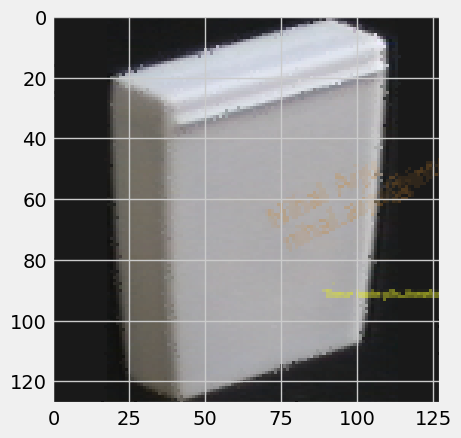

In [14]:
with h5py.File(orih5, 'r') as f_obj:
    dataset = f_obj['coil-100']
    # print("values: ", dataset[:])
    image = np.array(dataset['35.png'])
    print(image.shape)
    # plt.imshow(image, interpolation='none')

with h5py.File(orih5, 'r') as f_obj:
    dataset = f_obj['coil-100']
    # print("values: ", dataset[:])
    npimage = np.array(dataset['35.png'])
    pil_img = Image.fromarray(npimage)
    angle = random.randint(15,80)
    image = add_watermark(pil_img, texts=texts, angle=angle)
    npimage = np.array(image)
    print(npimage.shape)
    plt.imshow(npimage, interpolation='none')

In [15]:
coil_dataset = CoilDataset(orih5)
watermarked_dataset = CoilDataset(wtr5)

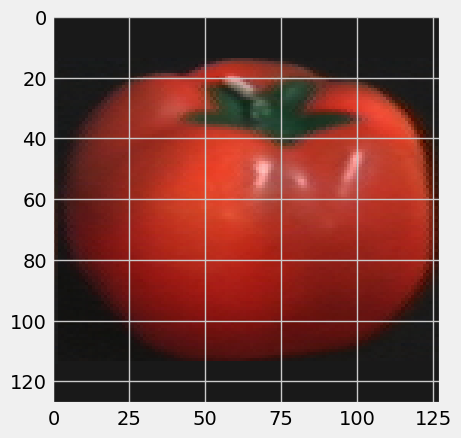

In [16]:
coil_dataset.plot_image(4105)

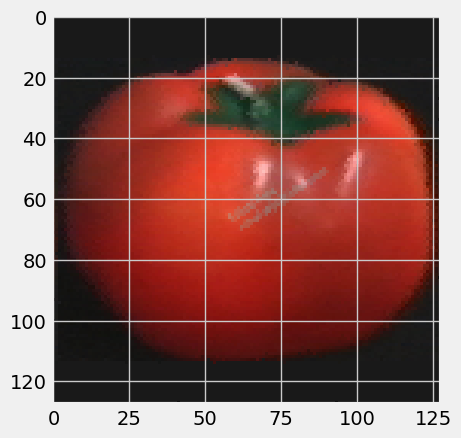

In [17]:
coil_dataset.plot_watermarked(4105)

In [18]:
# modified from https://github.com/pytorch/vision/issues/720

class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)

In [19]:
# discriminator class
# this one uses fewer parameters but also initially smaller conv filter

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            # expect input of shape (1,3,128,128)
            nn.Conv2d(3, 32, kernel_size=2, stride=1, padding = 1),
            nn.BatchNorm2d(32),
            nn.GELU(),

            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding = 3),
            nn.BatchNorm2d(64),
            nn.GELU(),
            
            nn.Conv2d(64, 128, kernel_size=8, stride=4, padding = 7),
            nn.BatchNorm2d(128),
            nn.GELU(),
            
            # nn.Conv2d(128, 256, kernel_size=16, stride=8, padding=15),
            # nn.LeakyReLU(0.2),
            
            View(128*19*19),
            nn.Linear(128*19*19, 100),
            nn.Dropout(0.25),
            nn.GELU(),
            nn.Linear(100,1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.lr = 1e-4
        self.optimiser = torch.optim.Adam(self.parameters(), lr=self.lr)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 100 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    def count_parameters(self):
        return sum(p.numel() for p in self.model.parameters() if p.requires_grad)
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

In [20]:
D = Discriminator()
D.to(device)
print(D)

image, _ = coil_dataset[10]
print(D(image).shape)
print(D.count_parameters())

/opt/anaconda3/envs/chine310-mps/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate='none')
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate='none')
    (6): Conv2d(64, 128, kernel_size=(8, 8), stride=(4, 4), padding=(7, 7))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): GELU(approximate='none')
    (9): View()
    (10): Linear(in_features=46208, out_features=100, bias=True)
    (11): Dropout(p=0.25, inplace=False)
    (12): GELU(approximate='none')
    (13): Linear(in_features=100, out_features=1, bias=True)
    (14): Sigmoid()
  )
  (loss_function): BCELoss()
)
torch.Size([1])
5179113


In [21]:
# %%time
# # test discriminator can separate real data from random noise
# # move model to cuda device

# for epoch in range(10):
#     cntr = 0
#     for image_data_tensor, wtr_data_tensor in coil_dataset:
#         # real data
#         D.train(image_data_tensor, torch.tensor([1.0], device=device, dtype=torch.float32))
#         D.train(wtr_data_tensor, torch.tensor([0.0], device=device, dtype=torch.float32))
#         cntr += 1
#         if cntr > 2e8:
#             break

        

# Generator Network 

In [22]:
# generator class

class AutoEncoderGenerator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            # expect input of shape (1,3,128,128)
            # encoder 2x2
            nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),

            # encoder 4x4
            nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=3),
            nn.BatchNorm2d(64),
            nn.GELU(),

            # encoder 8x8
            nn.Conv2d(64, 256, kernel_size=8, stride=1, padding=7),
            nn.BatchNorm2d(256),
            nn.GELU(),

            # decoder 8x8
            nn.ConvTranspose2d(256, 64, kernel_size=8, stride=1, padding=7),
            nn.BatchNorm2d(64),
            nn.GELU(),

            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=1, padding=3),
            nn.BatchNorm2d(32),
            nn.GELU(),

            nn.ConvTranspose2d(32, 3, kernel_size=2, stride=1, padding=1),
            nn.BatchNorm2d(3),
            nn.Tanh()
        )
        
        # create optimiser, simple stochastic gradient descent
        self.lr = 1e-4
        self.optimiser = torch.optim.Adam(self.parameters(), lr=self.lr)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []
        
        pass
    
    # def make_block()
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs) + inputs
    
    
    def train(self, D, inputs, target_image, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets) + ((target_image - g_output)**2).mean()

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 100 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    def count_parameters(self):
        return sum(p.numel() for p in self.model.parameters() if p.requires_grad)
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

In [23]:
G = AutoEncoderGenerator()
G.to(device)
print(G.count_parameters())

2164809


In [24]:
image,_ = watermarked_dataset[4105]
D.to(device)
output = G(image)
print(output.shape)
D(image)

torch.Size([1, 3, 128, 128])


tensor([0.4067], device='mps:0', grad_fn=<SigmoidBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


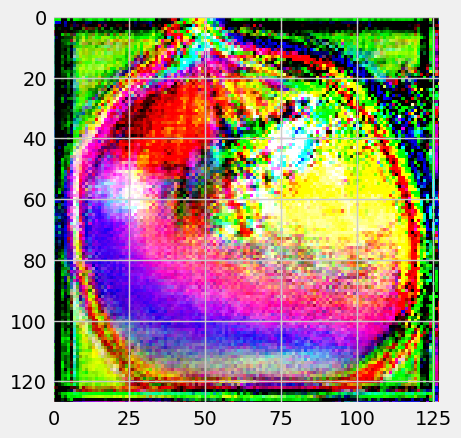

In [25]:
img = output.squeeze().permute(1,2,0).detach().cpu().numpy()
plt.imshow(img)

In [ ]:

D.lr = 2e-4
G.lr = 2e-4

In [35]:
%%time 

for epoch in range(10):
    if epoch%5 ==0: 
      D.lr /= 2
      G.lr /= 2
      print("epoch = ", epoch, "lr= ", G.lr)

    cntr = 0
    for image_data_tensor, wtr_data_tensor in coil_dataset:
      # train discriminator on true
      D.train(image_data_tensor, torch.tensor([1.0], device=device, dtype=torch.float32))
      D.train(wtr_data_tensor, torch.tensor([0.0], device=device, dtype=torch.float32))
      D.train(G(wtr_data_tensor).detach(), torch.tensor([0.0], device=device, dtype=torch.float32))
      # train generator
      G.train(D, wtr_data_tensor, image_data_tensor, torch.tensor([1.0], device=device, dtype=torch.float32))
      cntr += 1
      if cntr > 2e20:
        break


epoch =  0 lr=  0.00025
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
epoch =  5 lr=  0.000125
counter =  230000
counter =  240000
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
CPU times: user 1d 20h 46min 54s, sys: 20h 35min 27s, total: 2d 17h 22min 21s
Wall time: 13h 31min 58s


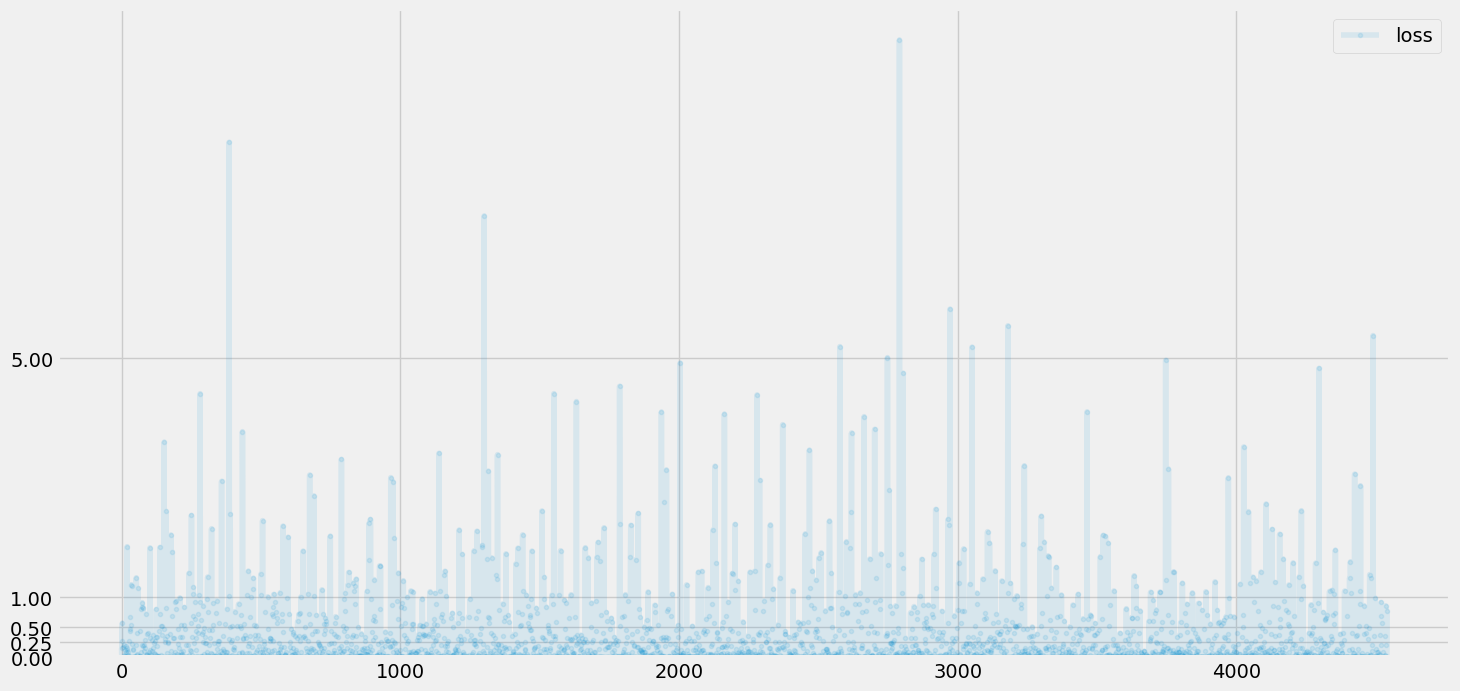

In [36]:
D.plot_progress()

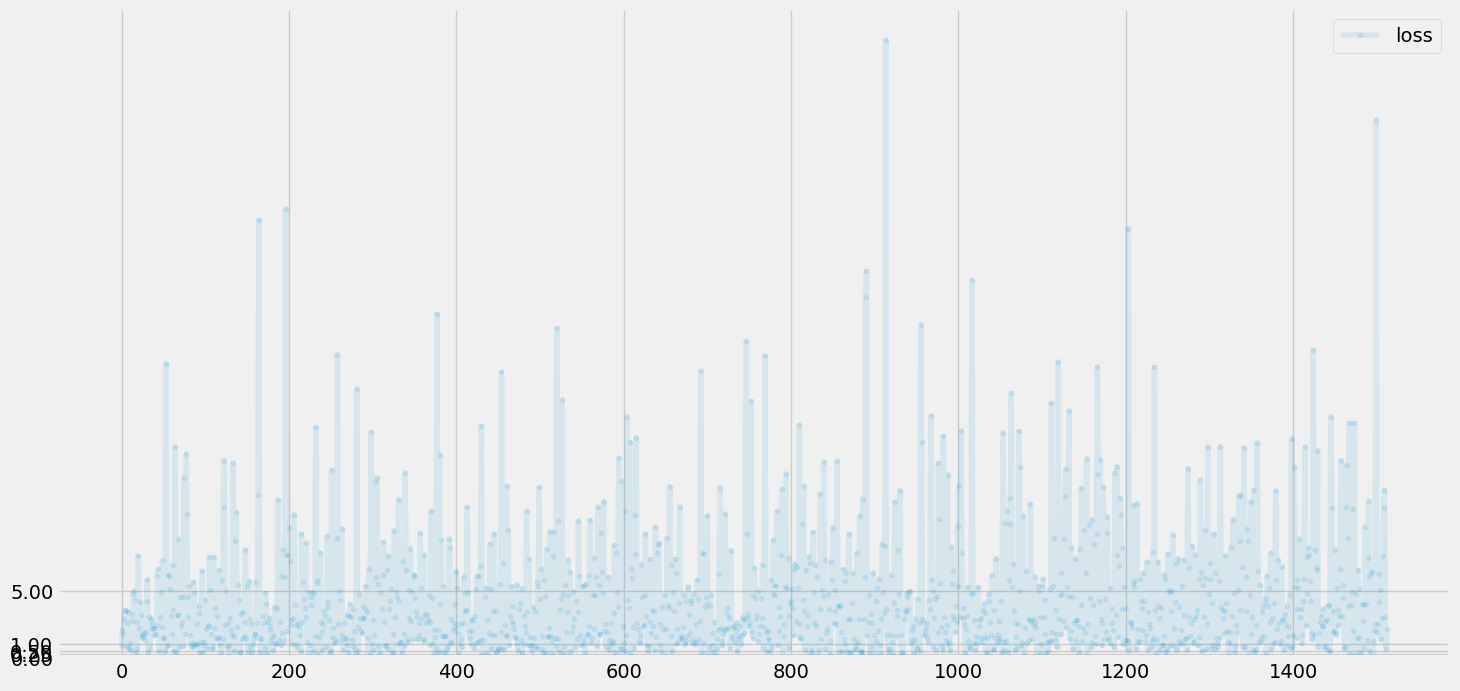

In [37]:
G.plot_progress()

In [38]:
n = 4105 #4105
image, wimage = coil_dataset[n]
print(D(image))
# wimage = watermarked_dataset[n]
print(D(wimage))

tensor([0.0620], device='mps:0', grad_fn=<SigmoidBackward0>)
tensor([1.4854e-28], device='mps:0', grad_fn=<SigmoidBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 128, 128])
tensor([0.3812], device='mps:0', grad_fn=<SigmoidBackward0>)
tensor([0.0002], device='mps:0', grad_fn=<SigmoidBackward0>)


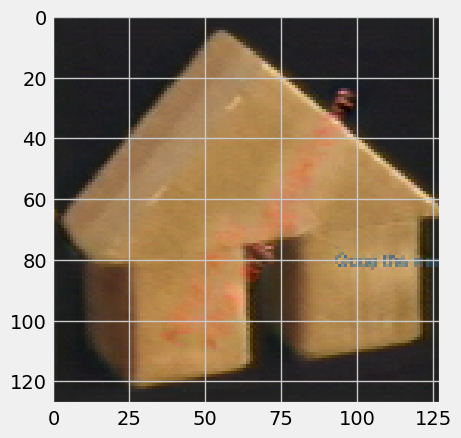

In [39]:
image, wimage = coil_dataset[205]
# D.to(device)
output = G(wimage)
print(output.shape)
cleaned_img = output.squeeze().permute(1,2,0).detach().cpu().numpy()
plt.imshow(cleaned_img)
print(D(image))
print(D(output))

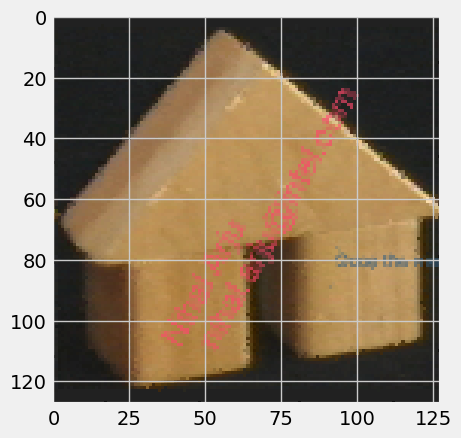

In [40]:
wimagen = wimage.squeeze().permute(1,2,0).detach().cpu().numpy()
plt.imshow(wimagen)

In [41]:
G.progress[-1]

2.0833301544189453

In [47]:
img[0][0]

array([1.1816596 , 0.92843986, 0.5224123 ], dtype=float32)

In [48]:
img[127][127]

array([-0.40115356, -0.7905941 , -0.26088104], dtype=float32)

In [49]:
# G = Generator()
# G.to(device)

In [50]:
G(image).shape

torch.Size([1, 3, 128, 128])

In [51]:
G.progress

[2.0771329402923584,
 3.4173800945281982,
 4.256008148193359,
 8.032100677490234,
 4.616846561431885,
 4.586203575134277,
 7.735894203186035,
 2.3579578399658203,
 1.414568305015564,
 10.719378471374512,
 3.260101318359375,
 3.466585159301758,
 2.539222002029419,
 3.3857333660125732,
 3.9061074256896973,
 2.568631172180176,
 4.321216106414795,
 1.1036649942398071,
 1.1776717901229858,
 3.4773313999176025,
 3.2565653324127197,
 3.1849331855773926,
 2.440998077392578,
 1.7235649824142456,
 1.2455438375473022,
 11.577706336975098,
 2.465503692626953,
 4.411704063415527,
 0.3616294264793396,
 0.244082510471344,
 2.741225242614746,
 1.6383240222930908,
 2.4518866539001465,
 3.2945046424865723,
 3.2300233840942383,
 1.7884881496429443,
 1.8763515949249268,
 1.3444689512252808,
 1.0659658908843994,
 1.43635892868042,
 1.5629050731658936,
 2.207691192626953,
 3.390782117843628,
 1.9342224597930908,
 1.5135931968688965,
 1.1573576927185059,
 1.1150355339050293,
 1.1551684141159058,
 2.232652902

In [ ]:
# generator class

# class Generator(nn.Module):

#     def __init__(self):
#         # initialise parent pytorch class
#         super().__init__()
        
#         # define neural network layers
#         self.block = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             nn.Conv2d(3, 32, kernel_size=2, stride=1),
#             nn.BatchNorm2d(32),
#             nn.LeakyReLU(0.05),

#             nn.ConvTranspose2d(32, 3, kernel_size=2, stride=1),
#             nn.BatchNorm2d(3),
#             nn.Tanh()
#         )

#         self.model = nn.Sequential(
#             self.block,
#             self.block
#         )

#         self.lr = 1e-2
        
#         # create optimiser, simple stochastic gradient descent
#         self.optimiser = torch.optim.Adam(self.model.parameters(), lr=self.lr)

#         # counter and accumulator for progress
#         self.counter = 0
#         self.progress = []
        
#         pass
    
    
#     def forward(self, inputs):        
#         # simply run model
#         return self.model(inputs) + inputs
    
    
#     def train(self, D, inputs, targets):
#         # calculate the output of the network
#         g_output = self.forward(inputs)
        
#         # pass onto Discriminator
#         d_output = D.forward(g_output)
        
#         # calculate error
#         loss = D.loss_function(d_output, targets) + ((inputs - g_output)**2).mean()

#         # increase counter and accumulate error every 10
#         self.counter += 1
#         if (self.counter % 100 == 0):
#             self.progress.append(loss.item())
#             pass

#         # zero gradients, perform a backward pass, update weights
#         self.optimiser.zero_grad()
#         loss.backward()
#         self.optimiser.step()

#         pass
    
    
#     def plot_progress(self):
#         df = pd.DataFrame(self.progress, columns=['loss'])
#         df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
#         pass
    
#     pass

In [ ]:
# # discriminator class

# class Discriminator(nn.Module):
    
#     def __init__(self):
#         # initialise parent pytorch class
#         super().__init__()
        
#         # define neural network layers
#         self.model = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             nn.Conv2d(3, 256, kernel_size=8, stride=2),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2),
            
#             nn.Conv2d(256, 256, kernel_size=8, stride=2),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2),
            
#             nn.Conv2d(256, 3, kernel_size=8, stride=2),
#             nn.LeakyReLU(0.2),
            
#             View(3*10*10),
#             nn.Linear(3*10*10, 1),
#             nn.Sigmoid()
#         )
        
#         # create loss function
#         self.loss_function = nn.BCELoss()

#         # create optimiser, simple stochastic gradient descent
#         self.optimiser = torch.optim.Adam(self.parameters(), lr=0.1e-4)

#         # counter and accumulator for progress
#         self.counter = 0;
#         self.progress = []

#         pass
    
    
#     def forward(self, inputs):
#         # simply run model
#         return self.model(inputs)
    
    
#     def train(self, inputs, targets):
#         # calculate the output of the network
#         outputs = self.forward(inputs)
        
#         # calculate loss
#         loss = self.loss_function(outputs, targets)

#         # increase counter and accumulate error every 10
#         self.counter += 1;
#         if (self.counter % 10 == 0):
#             self.progress.append(loss.item())
#             pass
#         if (self.counter % 1000 == 0):
#             print("counter = ", self.counter)
#             pass

#         # zero gradients, perform a backward pass, update weights
#         self.optimiser.zero_grad()
#         loss.backward()
#         self.optimiser.step()

#         pass
    
    
#     def plot_progress(self):
#         df = pd.DataFrame(self.progress, columns=['loss'])
#         df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
#         pass
    
#     pass

In [ ]:
# image, wimage = coil_dataset[7]
# # D.to(device)
# output = G2(wimage)
# print(output.shape)
# cleaned_img = output.squeeze().permute(1,2,0).detach().cpu().numpy()
# plt.imshow(cleaned_img)
# print(D(image))
# print(D(output))

In [ ]:
import os
os.getcwd()

'/Users/narju/Documents/code/educative/retouch/clean_watermark'

In [33]:
# G = AutoEncoderGenerator()
# G.load_state_dict(torch.load( "/Users/narju/Documents/code/educative/retouch/generator with autoencoder 2.pt"))

# D = Discriminator()
# D.load_state_dict(torch.load( "/Users/narju/Documents/code/educative/retouch/discriminator with multi convolutions 2.pt"))

# G.to(device)
# D.to(device)

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate='none')
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate='none')
    (6): Conv2d(64, 128, kernel_size=(8, 8), stride=(4, 4), padding=(7, 7))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): GELU(approximate='none')
    (9): View()
    (10): Linear(in_features=46208, out_features=100, bias=True)
    (11): Dropout(p=0.25, inplace=False)
    (12): GELU(approximate='none')
    (13): Linear(in_features=100, out_features=1, bias=True)
    (14): Sigmoid()
  )
  (loss_function): BCELoss()
)

In [42]:
torch.save(D.state_dict(), "/Users/narju/Documents/code/educative/retouch/discriminator with multi convolutions 3.pt")
torch.save(G.state_dict(), "/Users/narju/Documents/code/educative/retouch/generator with autoencoder 3.pt")

In [ ]:
# from transformers import pipeline
# translator = pipeline("translation_en_to_fr")
# #One line of code!
# print(translator("It is easy to translate languages with transformers", max_length=40))

AttributeError: 'Discriminator' object has no attribute 'seek'. You can only torch.load from a file that is seekable. Please pre-load the data into a buffer like io.BytesIO and try to load from it instead.